# 1. Importing Libraries required for data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2.Importing dataset 
This Dataset contains the essential imformations about the cars.Dataset is taken from the kaggle:https://www.kaggle.com/mayankpatel14/second-hand-used-cars-data-set-linear-regression

In [2]:
#importing dataset by using pandas library
secondhand_car_data=pd.read_csv("train.csv")

# 3.Basic Operation to know more about Dataset

In [3]:
#3.1 shape of dataset
np.shape(secondhand_car_data)
# our dataset contains 1000 instances and 12 attributes(features)

(1000, 12)

In [4]:
# 3.2 information about dataset
secondhand_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [5]:
# 3.3 Describtion of Dataset
secondhand_car_data.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [6]:
#3.4 checking null value in dataset
secondhand_car_data.isnull().value_counts()
#Our dataset have no null value

v.id   on road old  on road now  years  km     rating  condition  economy  top speed  hp     torque  current price
False  False        False        False  False  False   False      False    False      False  False   False            1000
dtype: int64

In [7]:
#3.5 Head of dataset
secondhand_car_data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [8]:
#3.6 correlation between attributes of dataset
secondhand_car_data.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


# 4. Exploratory Data Analysis(EDA)

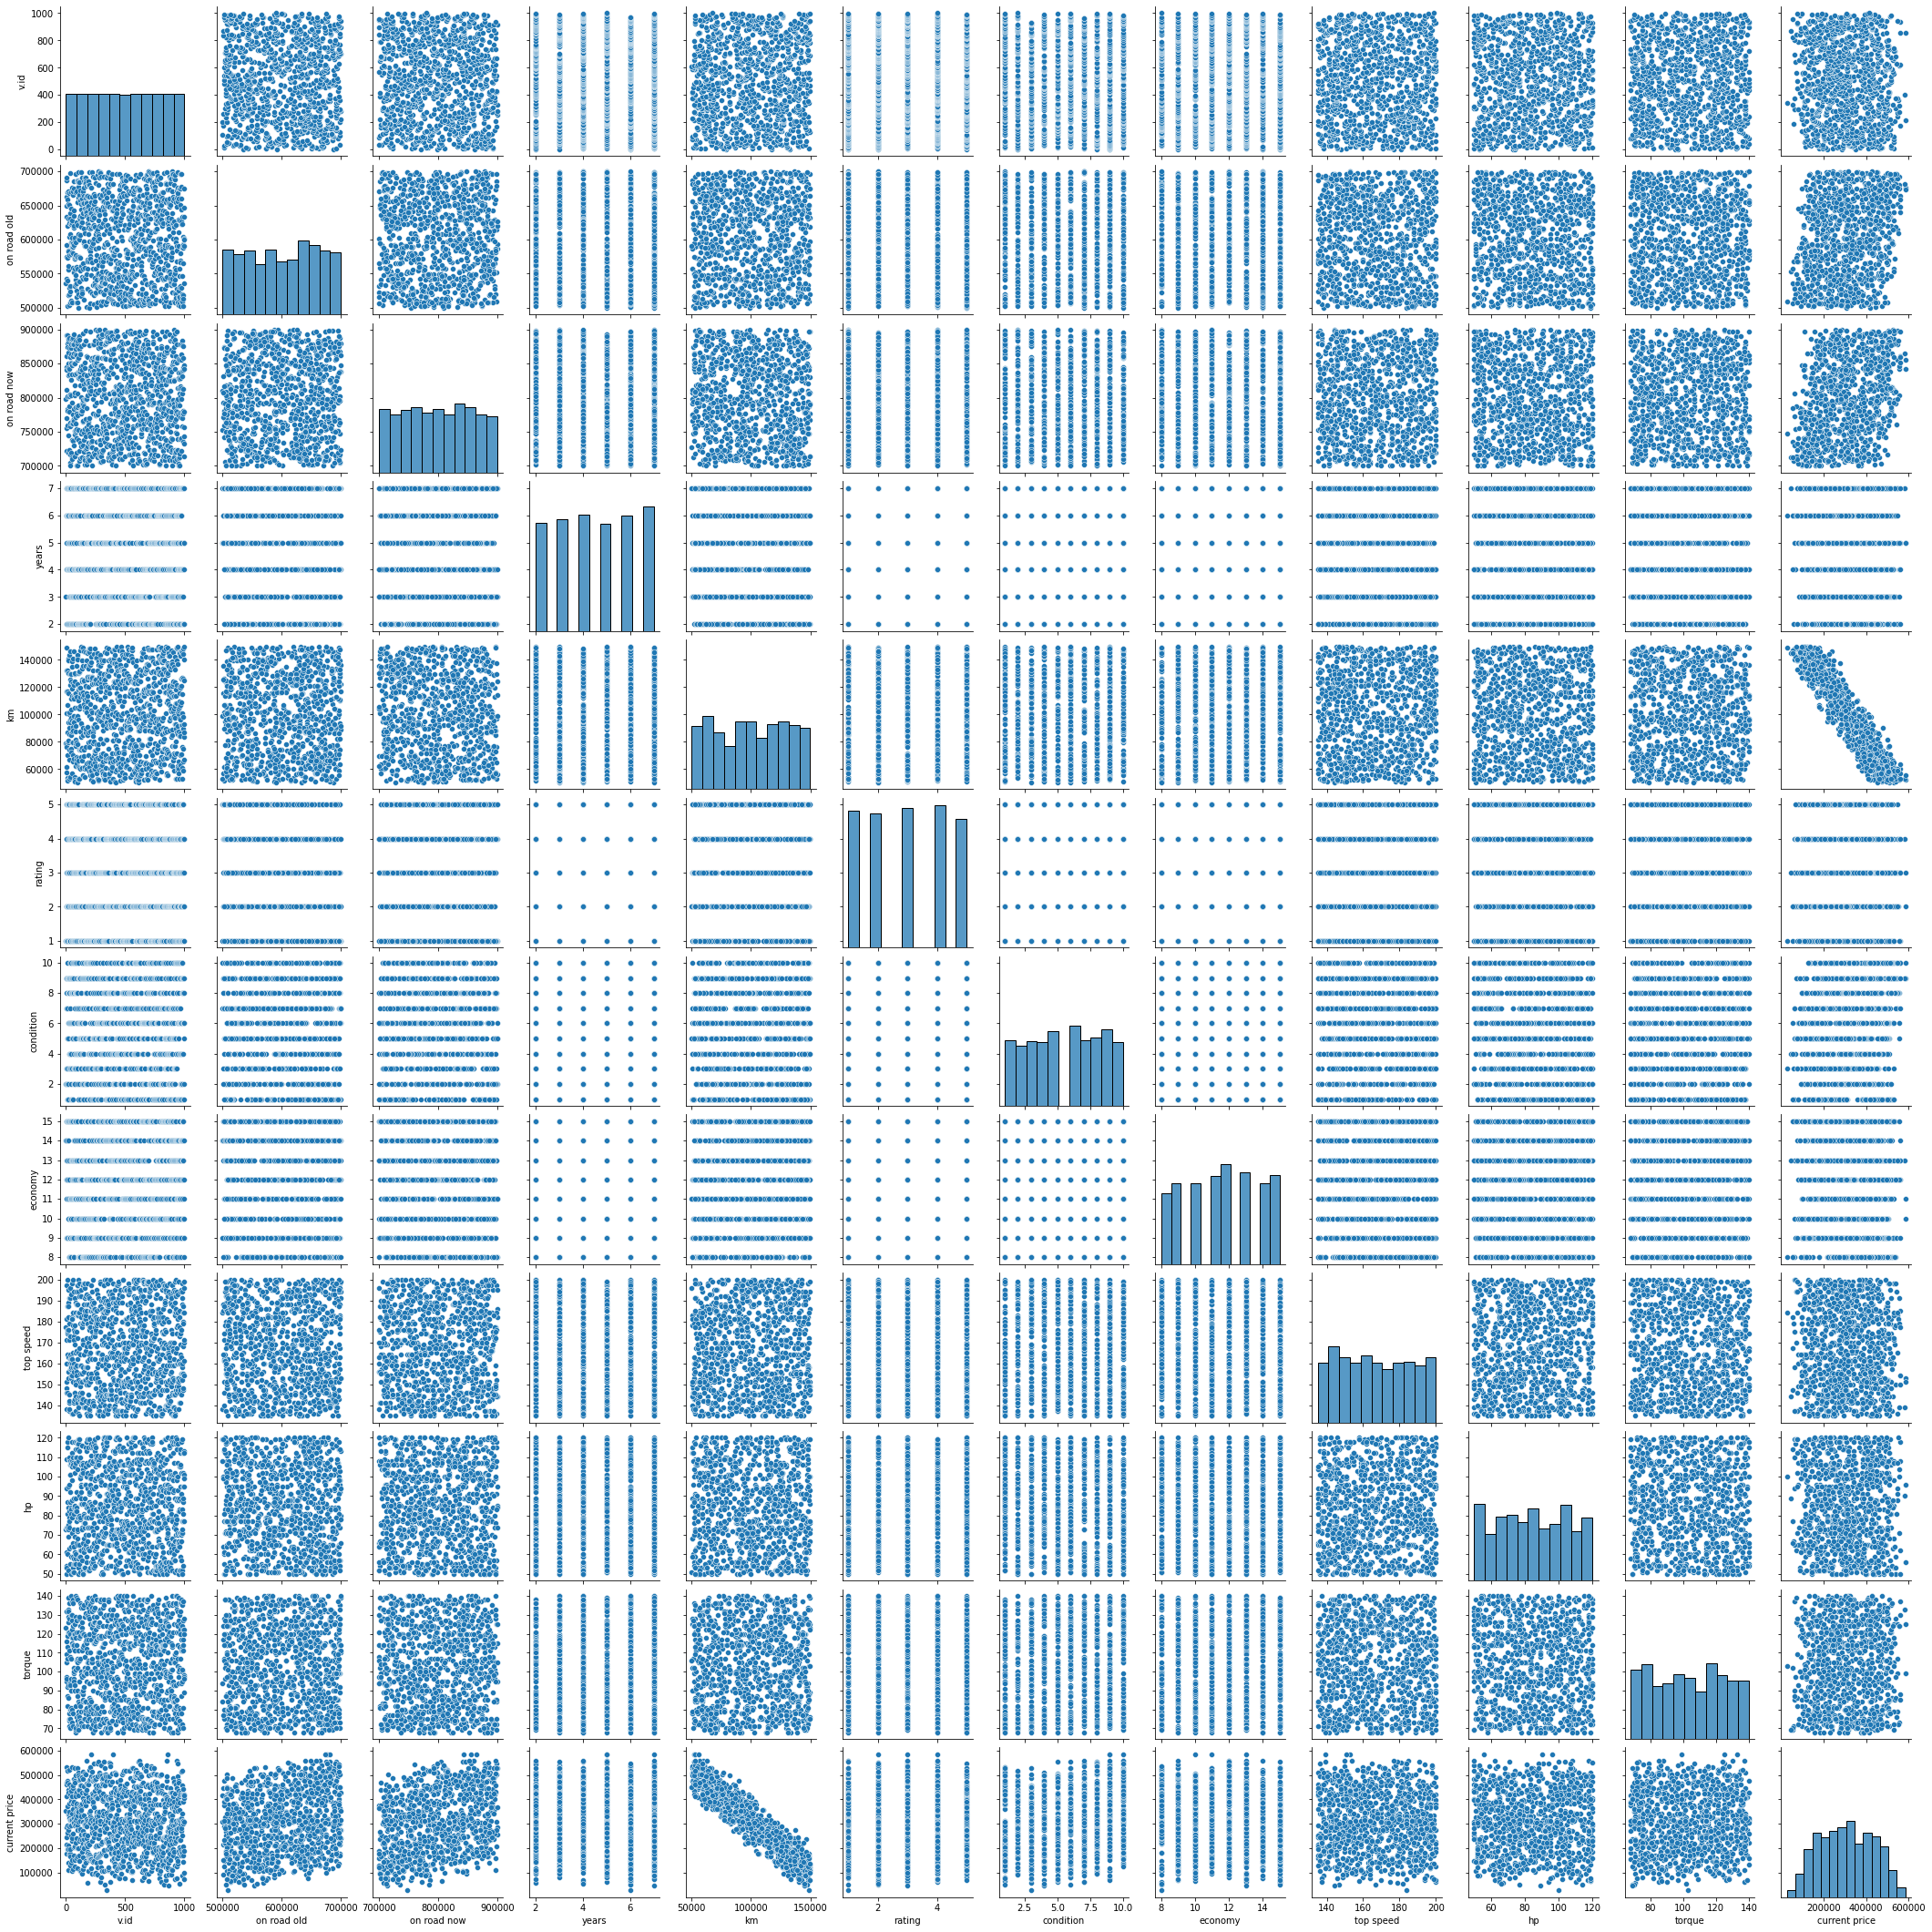

In [9]:
#4.1 Pairplot
sns.pairplot(secondhand_car_data)

<Figure size 7200x2160 with 0 Axes>

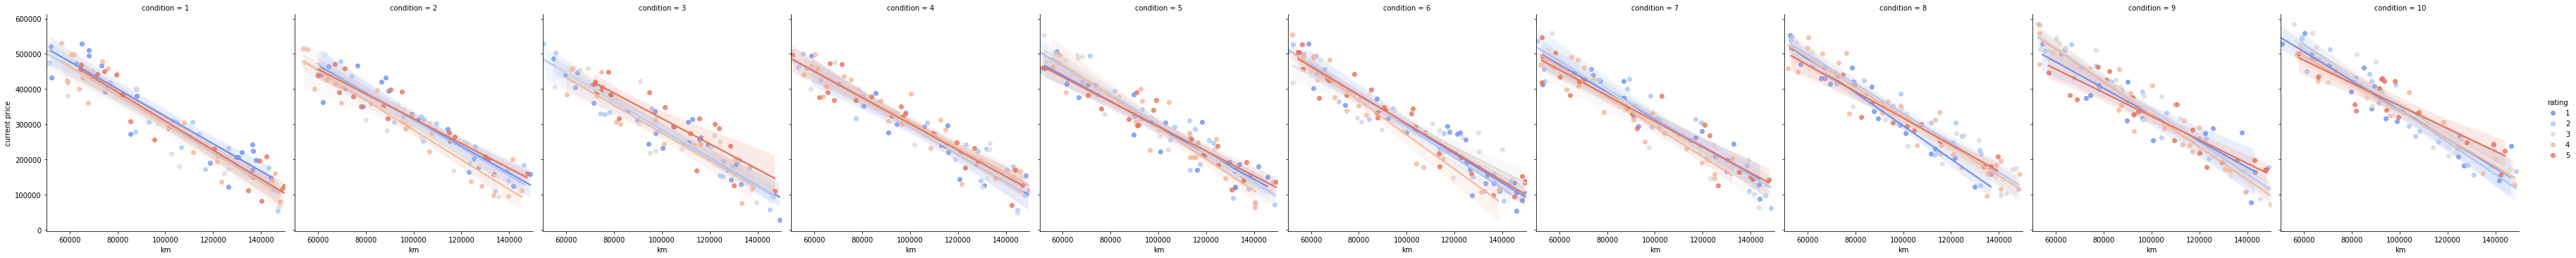

In [10]:
#4.2 lmplot(hue=rating)
plt.figure(figsize=(100,30))
sns.lmplot(x="km",y="current price",data=secondhand_car_data,hue="rating",col="condition",palette="coolwarm")

<Figure size 7200x432 with 0 Axes>

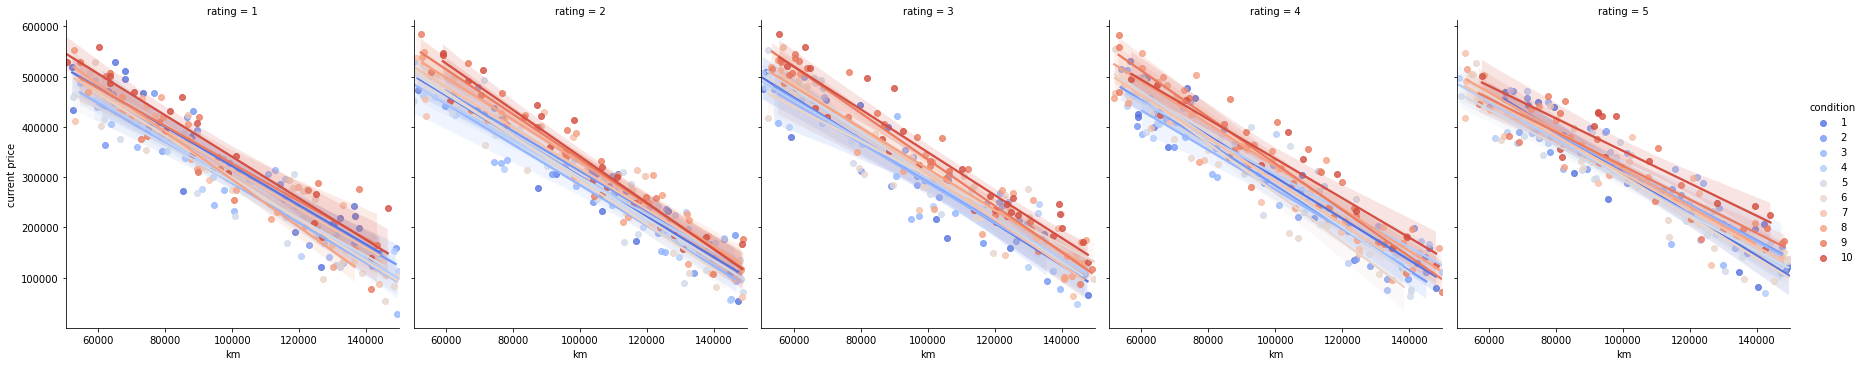

In [11]:
# 4.3 lmplot(hue=condition)
plt.figure(figsize=(100,6))
sns.lmplot(x="km",y="current price",data=secondhand_car_data,hue="condition",col="rating",palette="coolwarm")

Text(0.5, 1.0, 'Violin plot: condition vs current_price')

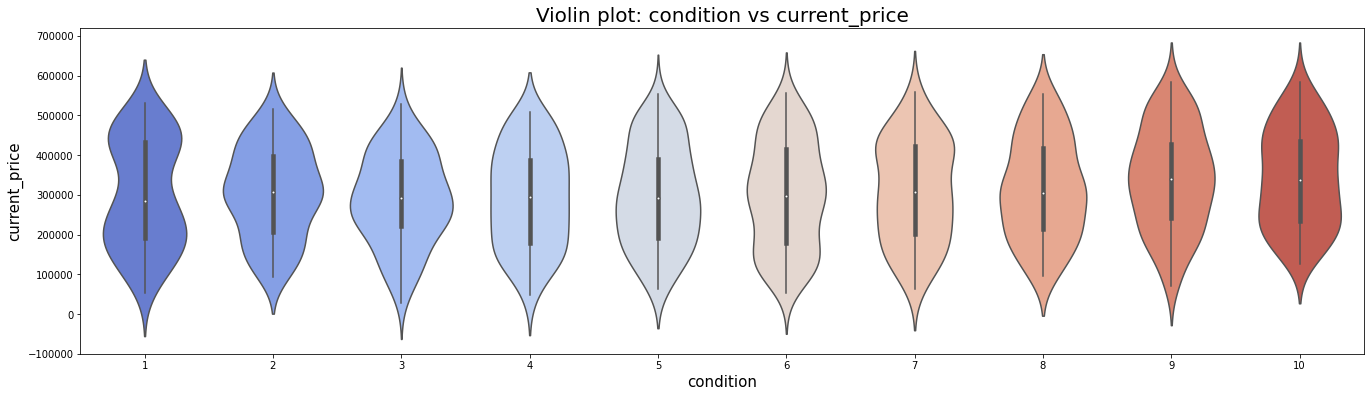

In [12]:
# 4.4 Violinplot:condition vs currentprice
plt.figure(figsize=(23,6))
sns.violinplot(x="condition",y="current price",data=secondhand_car_data,palette="coolwarm")
plt.xlabel("condition",fontsize=15)
plt.ylabel("current_price",fontsize=15)
plt.title("Violin plot: condition vs current_price",fontsize=20)

Text(0.5, 1.0, 'Boxplot: rating vs currentprice ')

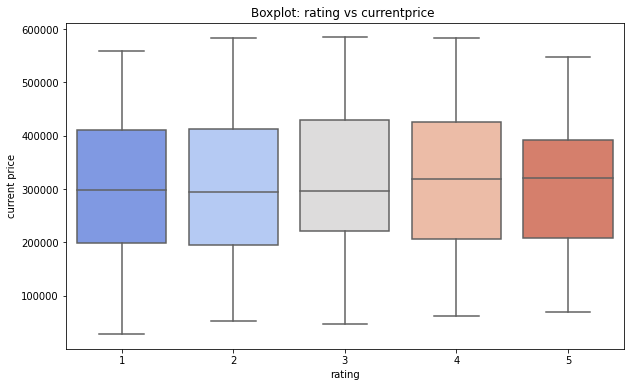

In [13]:
# 4.4 Boxpot:rating vs currentprice
plt.figure(figsize=(10,6))
sns.boxplot(x="rating",y="current price",data=secondhand_car_data,palette="coolwarm")
plt.title("Boxplot: rating vs currentprice ",fontsize=12)

Text(0.5, 1.0, 'Cluster plot')

<Figure size 720x576 with 0 Axes>

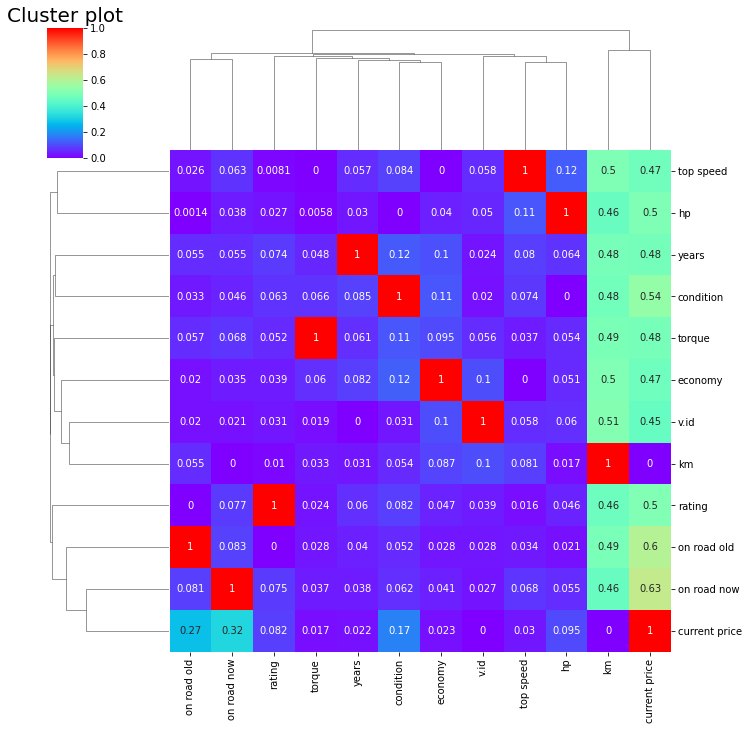

In [14]:
# 4.5 heatmap:correlation between attributes
plt.figure(figsize=(10,8))
sns.clustermap(secondhand_car_data.corr(),cmap="rainbow",annot=True,standard_scale=1)
plt.title("Cluster plot",fontsize=20)

# Machine Learning
Next up,we will train our regression models and predict the prices of the cars. 

# 5. Prediction of second hand car price

In [15]:
#dropping unnecessary colomns
secondhand_car_data.drop("v.id",axis=1,inplace=True)

# 5.1 Train Test Splitting


In [16]:
# Importing required library
from sklearn.model_selection import train_test_split

In [17]:
# 5.1.1 Train Test Splitting
X=secondhand_car_data.drop("current price",axis=1)
y=secondhand_car_data["current price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 5.2 Linear Regression

In [18]:
# 5.2.1 Tranning model
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [39]:
# 5.2.2 Cofficient Of Features
cofficient_dataframe=pd.DataFrame(linear_model.coef_,columns=["Cofficient"],index=secondhand_car_data.columns[:-1])
cofficient_dataframe

,Cofficient
on road old,0.495745
on road now,0.506080
years,-1662.991141
km,-3.993925
rating,301.493971
condition,4658.315322
economy,43.659979
top speed,-25.990318
hp,30.313305
torque,-3.932863


In [19]:
# 5.2.3 Testing the Model
linear_prediction=linear_model.predict(X_test)


In [20]:
# 5.2.4 Accuracy Of Model
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,linear_prediction))
print("MSE:",metrics.mean_squared_error(y_test,linear_prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,linear_prediction)))

MAE: 7301.11902523073
MSE: 74910665.9377139
RMSE: 8655.094796575824


Text(0.5, 1.0, 'Observation')

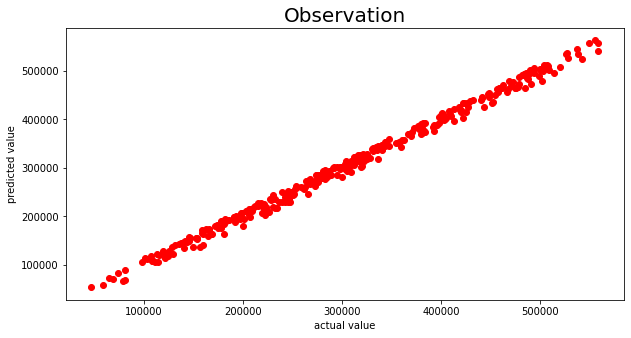

In [40]:
# 5.2.5 Obsevation
plt.figure(figsize=(10,5))
plt.scatter(y_test,linear_prediction,color="red")
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.title("Observation",fontsize=20)

# 5.3  KNN(K Nearest Neighbour)

In [22]:
# 5.3.1 Importing required Library
from sklearn.neighbors import KNeighborsRegressor

In [23]:
#5.3.2 Tranning the Model
knn_model=KNeighborsRegressor(n_neighbors=25)
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=25)

In [24]:
# 5.3.3 Testing the Model
knn_model_prediction=knn_model.predict(X_test)

Text(0.5, 1.0, 'Observation')

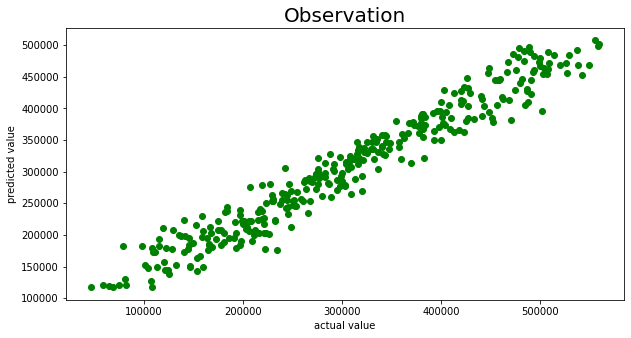

In [41]:
# 5.3.4 Observation Of Model
plt.figure(figsize=(10,5))
plt.scatter(y_test,knn_model_prediction,color="green")
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.title("Observation",fontsize=20)

In [26]:
# 5.3.5 Accuracy Of Model
print("MAE:",metrics.mean_absolute_error(y_test,knn_model_prediction))
print("MSE:",metrics.mean_squared_error(y_test,knn_model_prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,knn_model_prediction)))

MAE: 26914.077757575757
MSE: 1212810666.9124424
RMSE: 34825.43132414073


# 5.4 Decision Tree

In [27]:
# 5.4.1 Importing Library
from sklearn.tree import DecisionTreeRegressor
dtree_model=DecisionTreeRegressor()

In [28]:
# 5.4.2 Trainning the Model
dtree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
# 5.4.3 Testing the Model
dtree_model_predict= dtree_model.predict(X_test)

Text(0.5, 1.0, 'Observation')

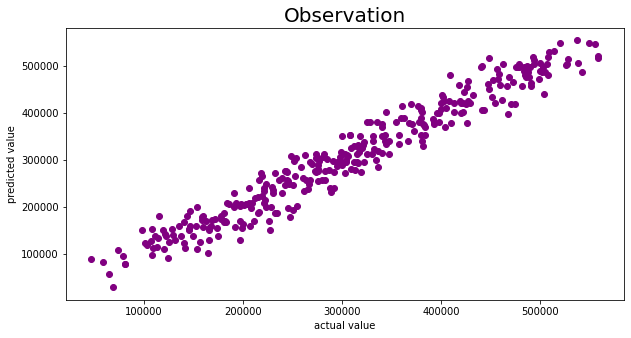

In [42]:
# 5.4.4 Observation 
plt.figure(figsize=(10,5))
plt.scatter(y_test,dtree_model_predict,color="purple")
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.title("Observation",fontsize=20)

In [31]:
# 5.4.5 Accuracy Of Model 
print("MAE:",metrics.mean_absolute_error(y_test,dtree_model_predict))
print("MSE:",metrics.mean_squared_error(y_test,dtree_model_predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,dtree_model_predict)))

MAE: 22426.446969696968
MSE: 798026502.7916666
RMSE: 28249.362874083843
